0:
* accuracy - это доля правильных ответов, сделанных моделью. На простом языке, количество попаданий, где предсказанный класс совпал с истинным.

* точность (precision) - это доля правильных ответов в пределах класса. То есть доля объектов действительно принадлежащих данному классу относительно всех объектов которые модель отнесла к этому классу. (TP/(TP+FP))

* полнота (recall) - это доля объектов, реально относящихся к положительному классу, которые были предсказаны верно (TP/(TP+FN))

* TPR - это же самое, что и recall - доля верно принятых объектов положительного класса. (TRUE POSITIVE RATE)

In [ ]:
from matplotlib import pyplot as plt

import pandas as pd
df = pd.read_csv("https://github.com/Murcha1990/ML_math_2022/raw/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BA%D0%B8/HW_3/credit_scoring_example1.csv")
df.head()

ParserError: ignored

In [ ]:
df.shape

(689, 21)

# **Задание 1** #

In [ ]:
print("target:", df["target"].value_counts())
print("1:", df["pred1_classes"].value_counts())
print("2:", df["pred2_classes"].value_counts())
print("3:", df["pred3_classes"].value_counts())

target: 0    382
1    307
Name: target, dtype: int64
1: 0    495
1    194
Name: pred1_classes, dtype: int64
2: 1    367
0    322
Name: pred2_classes, dtype: int64
3: 0    534
1    155
Name: pred3_classes, dtype: int64


Вывод: в таргете присутсвует больше единиц, чем нулей. Единиц примерно 45%.

# **Задание 2** #

In [ ]:
from sklearn.metrics import accuracy_score as acc

print("1. Accuracy:", acc(df["pred1_classes"], df["target"]))
print("2. Accuracy:", acc(df["pred2_classes"], df["target"]))
print("3. Accuracy:", acc(df["pred3_classes"], df["target"]))

1. Accuracy: 0.6618287373004355
2. Accuracy: 0.6719883889695211
3. Accuracy: 0.6400580551523948


Вывод: наиболее точный с точки зрения accuracy алгоритм - второй, хотя по качеству, все 3 алгоритма далеки от того, чтобы называться достаточно точными

# **Задание 3** #

In [ ]:
from sklearn.metrics import precision_score as pr, recall_score as rc


In [ ]:
print("1. Precision:", pr(df["target"], df["pred1_classes"]))
print("1. Recall:", rc(df["target"], df["pred1_classes"]))
print("2. Precision:", pr(df["target"], df["pred2_classes"]))
print("2. Recall:", rc(df["target"], df["pred2_classes"]))
print("3. Precision:", pr(df["target"], df["pred3_classes"]))
print("3. Recall:", rc(df["target"], df["pred3_classes"]))

1. Precision: 0.6907216494845361
1. Recall: 0.4364820846905538
2. Precision: 0.6103542234332425
2. Recall: 0.7296416938110749
3. Precision: 0.6903225806451613
3. Recall: 0.3485342019543974


# **Задание 4** #

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

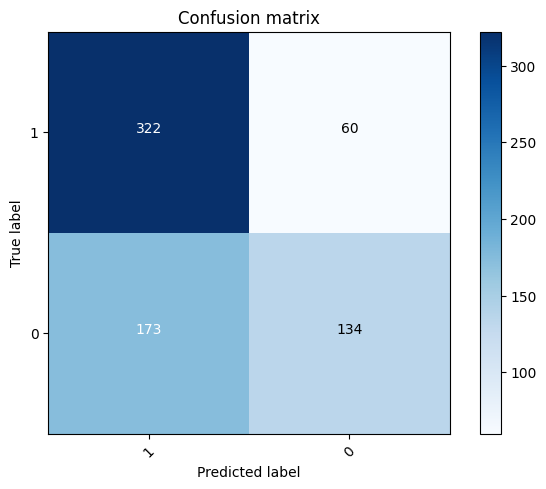

In [ ]:
matrix_1 = confusion_matrix(df["target"], df["pred1_classes"])
matrix_2 = confusion_matrix(df["target"], df["pred2_classes"])
matrix_3 = confusion_matrix(df["target"], df["pred3_classes"])

plot_confusion_matrix(matrix_1, df["pred1_classes"].unique())

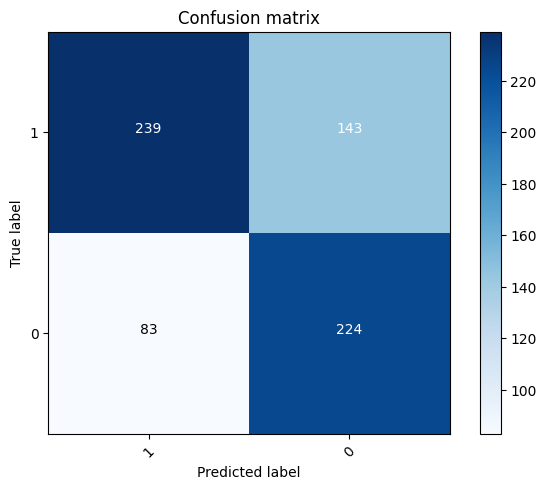

In [ ]:
plot_confusion_matrix(matrix_2, df["pred2_classes"].unique())

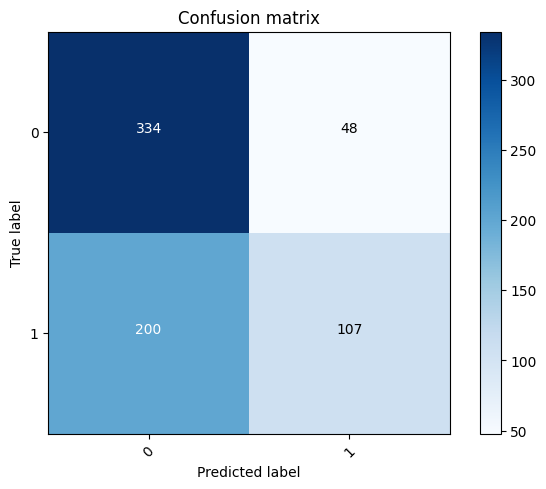

In [ ]:
plot_confusion_matrix(matrix_3, df["pred3_classes"].unique())

# **Задания 5-6** #

Давайте определимся с целями нашего предсказания:

  # **Вариант 1:** #
  хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
   Мы не хотим, чтобы алгоритм много ошибался: accuracy  >= 0.65.

Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).


In [ ]:
iv1 = 0
maxr = 0
for i in range(101):
  classes1 = df["pred1_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classes1)
  r = rc(df["target"], classes1)

  if a >= 0.65 and r > maxr:
    maxr = r
    iv1 = i
print("1 алгоритм: максимальное значение полноты:", maxr, "при пороге:", iv1/100)

1 алгоритм: максимальное значение полноты: 0.742671009771987 при пороге: 0.36


0.742671009771987


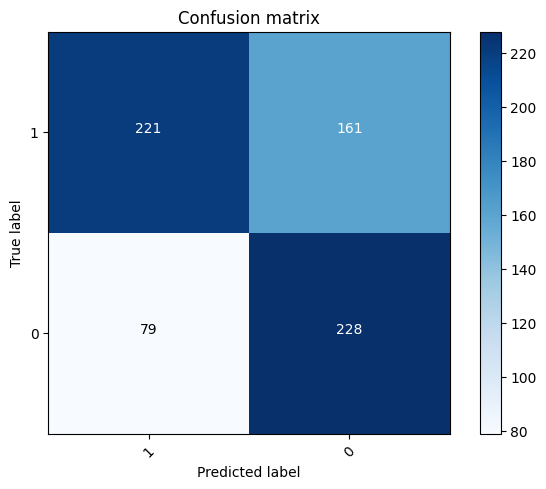

In [ ]:
classesl1 = df["pred1_probs"].map(lambda x: 1 if x>iv1/100 else 0)
matrix_l1 = confusion_matrix(df["target"], classesl1)

plot_confusion_matrix(matrix_l1, classesl1.unique())
print(rc(df["target"], classesl1))

In [ ]:
iv2 = 0
maxr = 0
for i in range(101):
  classes2 = df["pred2_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classes2)
  r = rc(df["target"], classes2)

  if a >= 0.65 and r > maxr:
    maxr = r
    iv2 = i
print("2 алгоритм: максимальное значение полноты:", maxr, "при пороге:", iv2/100)

2 алгоритм: максимальное значение полноты: 0.8371335504885994 при пороге: 0.27


0.8371335504885994


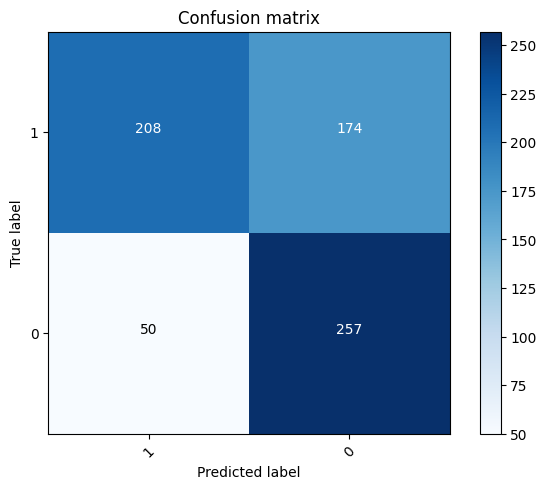

In [ ]:
classesl2 = df["pred2_probs"].map(lambda x: 1 if x>iv2/100 else 0)
matrix_l2 = confusion_matrix(df["target"], classesl2)

plot_confusion_matrix(matrix_l2, classesl2.unique())
print(rc(df["target"], classesl2))

In [ ]:
iv3 = 0
maxr = 0
for i in range(101):
  classes3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classes3)
  r = rc(df["target"], classes3)

  if a >= 0.65 and r > maxr:
    maxr = r
    iv3 = i
print(r)

0.0


Как мы видим, у 3-ему алгоритму ни при каком пороге не удалось преодолеть отметку accuracy = 0.65. Снизим порог, ради интереса до 0.6, чтобы посмотреть на результат алгоритма.

0.758957654723127


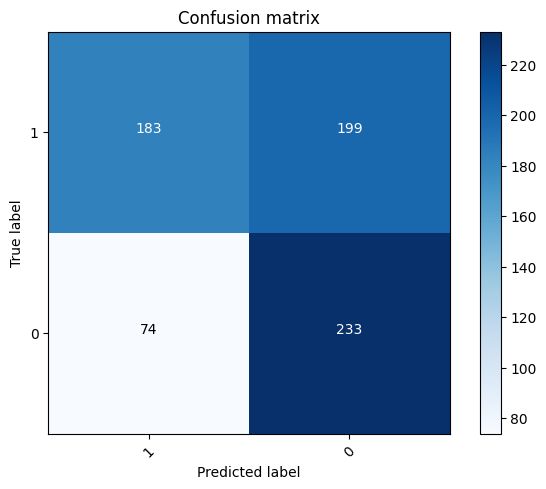

In [ ]:
iv3 = 0
maxr = 0
for i in range(101):
  classesl3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesl3)
  r = rc(df["target"], classesl3)

  if a >= 0.6 and r > maxr:
    maxr = r
    iv3 = i

classesl3 = df["pred3_probs"].map(lambda x: 1 if x>iv3/100 else 0)
matrix_l3 = confusion_matrix(df["target"], classesl3)

plot_confusion_matrix(matrix_l3, classesl3.unique())
print(rc(df["target"], classesl3))

Выводы: с вариантом 1 лучше всего справился 2 алгоритм, у него наиболее высокое значение полноты и наиболее "белая" левая нижняя ячейка (так как оси поменяны местами, она именно там, а не слева внизу).

# **Задания 7-8** #

# **Вариант 2** # (precision)

In [ ]:
ivo1 = 0
maxr = 0
for i in range(101):
  classeso1 = df["pred1_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso1)
  r = pr(df["target"], classeso1)

  if a >= 0.65 and r > maxr:
    maxr = r
    ivo1 = i
print("1 алгоритм: максимальное значение точности:", maxr, "при пороге:", ivo1/100)

1 алгоритм: максимальное значение точности: 0.7371794871794872 при пороге: 0.54


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7371794871794872


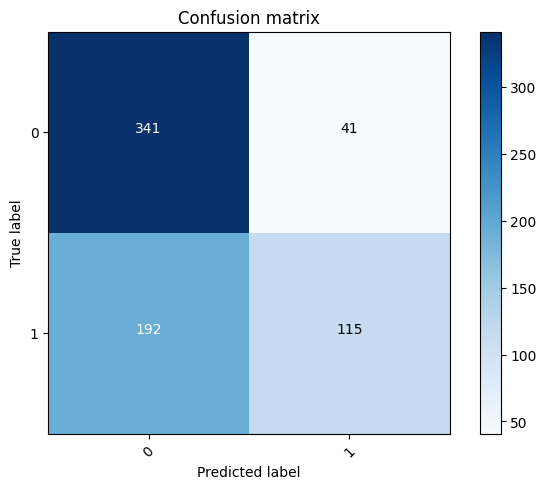

In [ ]:
classeso1 = df["pred1_probs"].map(lambda x: 1 if x>ivo1/100 else 0)
matrix_o1 = confusion_matrix(df["target"], classeso1)

plot_confusion_matrix(matrix_o1, classeso1.unique())
print(pr(df["target"], classeso1))

In [ ]:
ivo2 = 0
maxr = 0
for i in range(101):
  classeso2 = df["pred2_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso2)
  r = pr(df["target"], classeso2)

  if a >= 0.65 and r > maxr:
    maxr = r
    ivo2 = i
print("2 алгоритм: максимальное значение точности:", maxr, "при пороге:", ivo2/100)

2 алгоритм: максимальное значение точности: 0.8367346938775511 при пороге: 0.73


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

0.8367346938775511


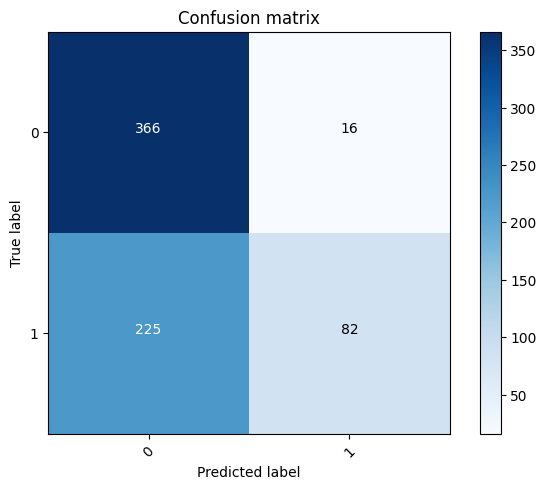

In [ ]:
classeso2 = df["pred2_probs"].map(lambda x: 1 if x>ivo2/100 else 0)
matrix_o2 = confusion_matrix(df["target"], classeso2)

plot_confusion_matrix(matrix_o2, classeso2.unique())
print(pr(df["target"], classeso2))

In [ ]:
ivo3 = 0
maxr = 0
for i in range(101):
  classeso3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso3)
  r = pr(df["target"], classeso3)

  if a >= 0.65 and r > maxr:
    maxr = r
    ivo3 = i
print(r)
print("3 алгоритм: максимальное значение точности:", maxr, "при пороге:", ivo3/100)

0.0
3 алгоритм: максимальное значение точности: 0 при пороге: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(3 алгоритм не проходит accuracy 0.65). Снизим до 0.6.


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3 алгоритм: максимальное значение точности: 0.7530864197530864 при пороге: 0.89
0.7530864197530864


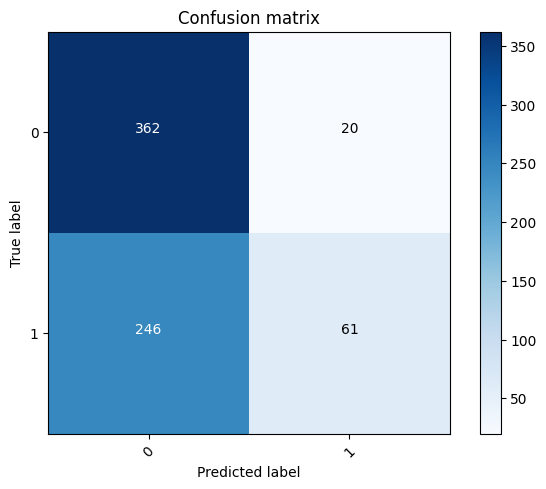

In [ ]:
ivo3 = 0
maxr = 0
for i in range(101):
  classeso3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso3)
  r = pr(df["target"], classeso3)

  if a >= 0.6 and r > maxr:
    maxr = r
    ivo3 = i
print("3 алгоритм: максимальное значение точности:", maxr, "при пороге:", ivo3/100)

classeso3 = df["pred3_probs"].map(lambda x: 1 if x>ivo3/100 else 0)
matrix_o3 = confusion_matrix(df["target"], classeso3)

plot_confusion_matrix(matrix_o3, classeso3.unique())
print(pr(df["target"], classeso3))

Вывод: с поставленной задачей лучше всего так же справился 2 алгоритм, у него наиболее высокое значение точности и наиболее "белая" правая верхняя ячейка.

# **Задание 9** #

# **Вариант 3**  (f1) #
```



In [ ]:
from sklearn.metrics import f1_score as f1

In [ ]:
ivf1 = 0
maxr = 0
for i in range(101):
  classesf1 = df["pred1_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf1)
  r = f1(df["target"], classesf1)

  if a >= 0.65 and r > maxr:
    maxr = r
    ivf1 = i
print("1 алгоритм: максимальное значение f1:", maxr, "при пороге:", ivf1/100)

1 алгоритм: максимальное значение f1: 0.6551724137931035 при пороге: 0.36


0.6551724137931035


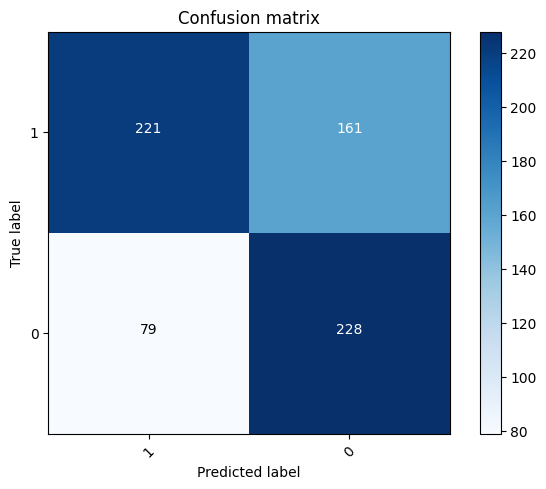

In [ ]:
classesf1 = df["pred1_probs"].map(lambda x: 1 if x>ivf1/100 else 0)
matrix_f1 = confusion_matrix(df["target"], classesf1)

plot_confusion_matrix(matrix_f1, classesf1.unique())
print(f1(df["target"], classesf1))

In [ ]:
ivf2 = 0
maxr = 0
for i in range(101):
  classesf2 = df["pred2_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf2)
  r = f1(df["target"], classesf2)

  if a >= 0.65 and r > maxr:
    maxr = r
    ivf2 = i
print("2 алгоритм: максимальное значение f1:", maxr, "при пороге:", ivf2/100)

2 алгоритм: максимальное значение f1: 0.6990291262135923 при пороге: 0.32


0.6990291262135923


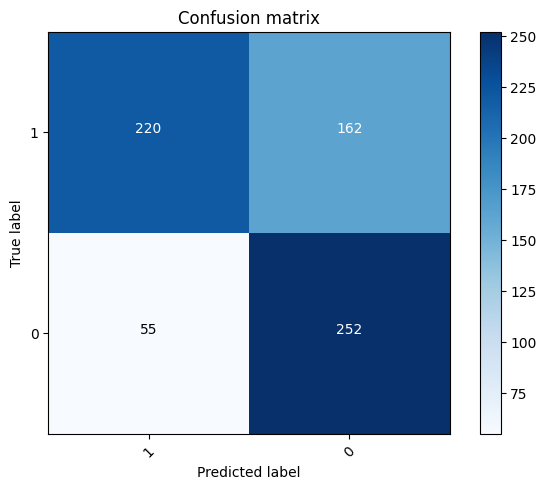

In [ ]:
classesf2 = df["pred2_probs"].map(lambda x: 1 if x>ivf2/100 else 0)
matrix_f2 = confusion_matrix(df["target"], classesf2)

plot_confusion_matrix(matrix_f2, classesf2.unique())
print(f1(df["target"], classesf2))

In [ ]:
ivf3 = 0
maxr = 0
for i in range(101):
  classesf3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf3)
  r = f1(df["target"], classesf3)

  if a >= 0.65 and r > maxr:
    maxr = r
    ivf3 = i
print(r)

0.0


3 алгоритм как всегда...

In [ ]:
ivf3 = 0
maxr = 0
for i in range(101):
  classesf3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf3)
  r = f1(df["target"], classesf3)

  if a >= 0.6 and r > maxr:
    maxr = r
    ivf3 = i
print("3 алгоритм: максимальное значение f1:", maxr, "при пороге:", ivf3/100)

3 алгоритм: максимальное значение f1: 0.6305818673883626 при пороге: 0.18


0.6305818673883626


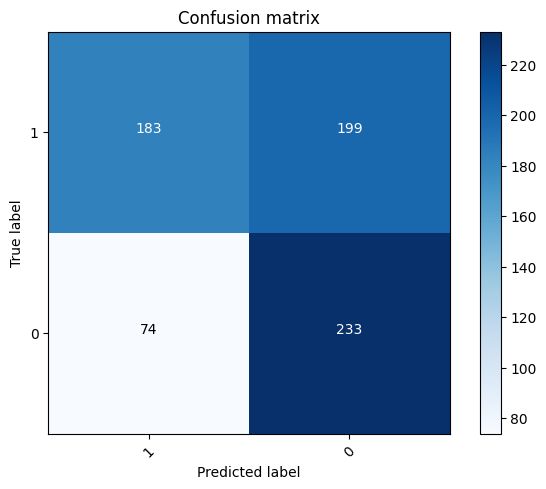

In [ ]:
classesf3 = df["pred3_probs"].map(lambda x: 1 if x>ivf3/100 else 0)
matrix_f3 = confusion_matrix(df["target"], classesf3)

plot_confusion_matrix(matrix_f3, classesf3.unique())
print(f1(df["target"], classesf3))

Вывод: с поставленной задачей так же лучше всего справился 2 алгоритм, у негоо наиболее высокое значение по метрике f1 и наиболее яркие, контрастные диагональные ячейки.

# **Задания 10-11** #

# **Обучим свою модель для предсказания target.** #


In [ ]:
df1 = df.drop("pred1_probs", axis = 1).drop("pred2_probs", axis = 1).drop("pred3_probs", axis = 1).drop("pred1_classes", axis = 1).drop("pred2_classes", axis = 1).drop("pred3_classes", axis = 1)

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df1.drop("target", axis = 1), df1["target"], test_size = 0.3, random_state = 42)

pipeline = make_pipeline(StandardScaler(),
    GridSearchCV(LogisticRegression(), param_grid={"C": [0.01, 0.1, 1, 10, 100]}, scoring='f1', cv=5))

pipeline.fit(Xtrain, ytrain)

print("train:", classification_report(ytrain, pipeline.predict(Xtrain)), "\ntest:", classification_report(ytest, pipeline.predict(Xtest)))

NameError: ignored

In [ ]:
pred_proba = pd.Series(pd.DataFrame(lr.predict_proba(Xtest))[1])
print(pred_proba)

0      0.907475
1      0.936905
2      0.173687
3      0.094112
4      0.783613
         ...   
202    0.625023
203    0.155109
204    0.770807
205    0.223953
206    0.999999
Name: 1, Length: 207, dtype: float64


 а) точность

In [ ]:
maxi = 0
maxr = 0
for i in range(101):

  classes = pred_proba.map(lambda x: 1 if x>i/100 else 0)
  a = acc(ytest, classes)
  r = pr(ytest, classes)
  if a >= 0.65 and r > maxr:
    maxr = r
    maxi = i
print("максимальное значение точности:", maxr, "при пороге:", maxi/100)

максимальное значение точности: 0.967741935483871 при пороге: 0.93


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.967741935483871


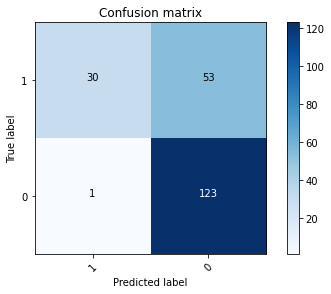

In [ ]:
classes = pred_proba.map(lambda x: 1 if x>maxi/100 else 0)
matrix = confusion_matrix(ytest, classes)

plot_confusion_matrix(matrix.T[::-1].T[::-1], classes.unique()[::-1])
print(pr(ytest, classes))

In [ ]:
print(ytest.value_counts())
print(classes.value_counts())

0    124
1     83
Name: target, dtype: int64
0    176
1     31
Name: 1, dtype: int64


б) полноту

In [ ]:
maxi = 0
maxr = 0
for i in range(101):
  classes = pred_proba.map(lambda x: 1 if x>i/100 else 0)
  a = acc(ytest, classes)
  r = rc(ytest, classes)
  if a >= 0.65 and r > maxr:
    maxr = r
    maxi = i
print("максимальное значение f1:", maxr, "при пороге:", maxi/100)

максимальное значение f1: 0.963855421686747 при пороге: 0.16


0.963855421686747


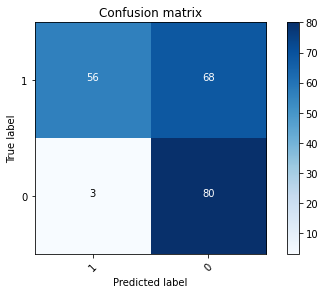

In [ ]:
classes = pred_proba.map(lambda x: 1 if x>maxi/100 else 0)
matrix = confusion_matrix(ytest, classes)

plot_confusion_matrix(matrix, classes.unique())
print(rc(ytest, classes))

в) f1-score

In [ ]:
maxi = 0
maxr = 0
for i in range(101):
  classes = pred_proba.map(lambda x: 1 if x>i/100 else 0)
  a = acc(ytest, classes)
  r = f1(ytest, classes)
  if a >= 0.65 and r > maxr:
    maxr = r
    maxi = i
print("максимальное значение f1:", maxr, "при пороге:", maxi/100)

максимальное значение f1: 0.8235294117647061 при пороге: 0.52


0.8235294117647061


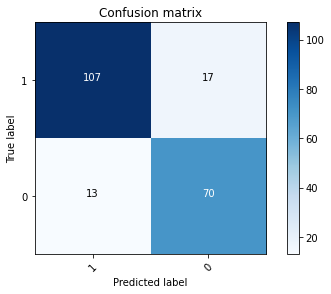

In [ ]:
classes = pred_proba.map(lambda x: 1 if x>maxi/100 else 0)
matrix = confusion_matrix(ytest, classes)

plot_confusion_matrix(matrix, classes.unique())
print(f1(ytest, classes))

Невооруженным глазом, и по матрицам, и по цифрам видно, что логистическая регрессия намного лучше справилась с задачей.